# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [1]:
# Dependencies and Setup
import pandas as pd
import requests
from pathlib import Path

# Import API key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
csv_file = Path("output_data/cities.csv")
city_data_df = pd.read_csv(csv_file)

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,devonport,-41.1667,146.3500,9.45,6.96,85,4.69,AU,1687788511
1,1,mogocha,53.7333,119.7667,16.74,16.74,100,1.51,RU,1687788595
2,2,ormara,25.2088,64.6357,29.51,29.51,55,6.56,PK,1687788596
3,3,el galpon,-25.3807,-64.6526,23.64,23.64,0,1.34,AR,1687788597
4,4,tiksi,71.6872,128.8694,10.26,10.26,92,2.81,RU,1687788598


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

<Axes: >

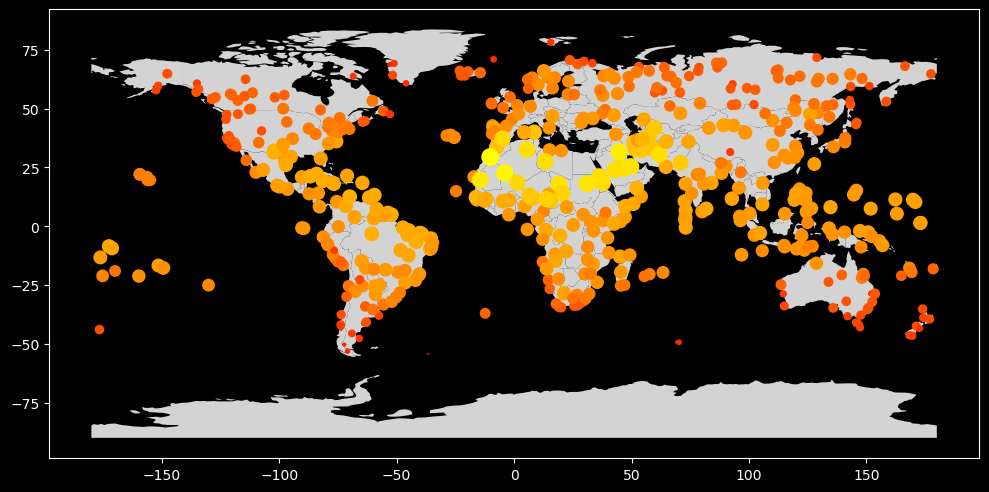

In [3]:
%%capture --no-display

# Configure the map plot
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gdp

worldmap = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(12, 12))

x = city_data_df['Lng']
y = city_data_df['Lat']
z = city_data_df['Humidity']
plt.scatter(x, y, s=3*z, c=z, alpha=1.0, cmap='autumn', zorder=10)

# Display the map
worldmap.plot(color='lightgrey', ax=ax, zorder=5)


### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [4]:
# Narrow down cities that fit criteria and drop any results with null values
nice_city_data_df = city_data_df[city_data_df['Max Temp'] < 27.0]
nice_city_data_df = nice_city_data_df[nice_city_data_df['Max Temp'] > 21.0]
nice_city_data_df = nice_city_data_df[nice_city_data_df['Wind Speed'] < 4.5]
nice_city_data_df = nice_city_data_df[nice_city_data_df['Cloudiness'] == 0]

# Drop any rows with null values
nice_city_data_df = nice_city_data_df.dropna()

# Display sample data
nice_city_data_df


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,3,el galpon,-25.3807,-64.6526,23.64,23.64,0,1.34,AR,1687788597
21,21,lewistown,40.5992,-77.5714,25.52,21.20,0,0.00,US,1687788613
76,76,botshabelo,-29.2702,26.7052,21.65,21.65,0,3.89,ZA,1687788659
79,79,campina verde,-19.5356,-49.4864,24.69,24.69,0,3.04,BR,1687788662
101,101,arraial do cabo,-22.9661,-42.0278,25.92,25.92,0,2.06,BR,1687788683
113,113,lagoa formosa,-18.7786,-46.4075,23.34,23.34,0,3.79,BR,1687788694
145,145,richards bay,-28.7830,32.0377,21.23,21.23,0,3.04,ZA,1687788722
183,183,zvishavane,-20.3267,30.0665,23.69,23.69,0,2.42,ZW,1687788753
198,198,coxim,-18.5067,-54.7600,26.40,26.40,0,3.63,BR,1687788767
344,344,fereydun kenar,36.6864,52.5225,26.00,26.00,0,3.77,IR,1687788896


### Step 3: Create a new DataFrame called `hotel_df`.

In [5]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = nice_city_data_df.copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df['Hotel Name'] = ''

# Display sample data
hotel_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel Name
3,3,el galpon,-25.3807,-64.6526,23.64,23.64,0,1.34,AR,1687788597,
21,21,lewistown,40.5992,-77.5714,25.52,21.20,0,0.00,US,1687788613,
76,76,botshabelo,-29.2702,26.7052,21.65,21.65,0,3.89,ZA,1687788659,
79,79,campina verde,-19.5356,-49.4864,24.69,24.69,0,3.04,BR,1687788662,
101,101,arraial do cabo,-22.9661,-42.0278,25.92,25.92,0,2.06,BR,1687788683,
113,113,lagoa formosa,-18.7786,-46.4075,23.34,23.34,0,3.79,BR,1687788694,
145,145,richards bay,-28.7830,32.0377,21.23,21.23,0,3.04,ZA,1687788722,
183,183,zvishavane,-20.3267,30.0665,23.69,23.69,0,2.42,ZW,1687788753,
198,198,coxim,-18.5067,-54.7600,26.40,26.40,0,3.63,BR,1687788767,
344,344,fereydun kenar,36.6864,52.5225,26.00,26.00,0,3.77,IR,1687788896,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [6]:
# Set parameters to search for a hotel
radius = 10000
params = {
    'catetory': 'accomdation.hotel',
    'filter': 'circle:lon,lat,10000',
    'bias': 'proximity:lon,lat'
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    lat = row['Lat']
    lon = row['Lng']
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = 'circle:' + ','.join([str(lon), str(lat), str(10000)])
    params["bias"] = 'proximity:' + ','.join([str(lon), str(lat)])
    
    # Set base URL
    # This URL requires parameters e.g. &categories=accommodation.hotel&filter=circle:lon,lat,radiusMeters&bias=proximity:lon,lat
    base_url = "https://api.geoapify.com/v2/places" + '?categories=accommodation.hotel&apiKey=' + geoapify_key + '&filter=' + params['filter'] + '&bias=' + params['bias']


    # Make and API request using the params dictionary
    name_address = requests.get(base_url)
    
    # Convert the API response to JSON format
    name_address = name_address.json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
el galpon - nearest hotel: No hotel found
lewistown - nearest hotel: No hotel found
botshabelo - nearest hotel: No hotel found
campina verde - nearest hotel: No hotel found
arraial do cabo - nearest hotel: No hotel found
lagoa formosa - nearest hotel: Hotel HS
richards bay - nearest hotel: Bon Hotel Waterfront
zvishavane - nearest hotel: Zvishavane Panorama Lodge
coxim - nearest hotel: Avendita
fereydun kenar - nearest hotel: هتل کیش مهر
ercis - nearest hotel: No hotel found
shijiang - nearest hotel: No hotel found
robore - nearest hotel: Lajas
miandrivazo - nearest hotel: Baobab
imbituba - nearest hotel: Silvestre Praia Hotel
gallup - nearest hotel: No hotel found
kristiansund - nearest hotel: Comfort Hotel Fosna
daye - nearest hotel: 铜花酒店
fiambala - nearest hotel: Cabañas Lunita
jasper - nearest hotel: Econo Lodge
chipinge - nearest hotel: No hotel found
petauke - nearest hotel: Chimwemwe Lodge


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel Name
3,3,el galpon,-25.3807,-64.6526,23.64,23.64,0,1.34,AR,1687788597,No hotel found
21,21,lewistown,40.5992,-77.5714,25.52,21.20,0,0.00,US,1687788613,No hotel found
76,76,botshabelo,-29.2702,26.7052,21.65,21.65,0,3.89,ZA,1687788659,No hotel found
79,79,campina verde,-19.5356,-49.4864,24.69,24.69,0,3.04,BR,1687788662,No hotel found
101,101,arraial do cabo,-22.9661,-42.0278,25.92,25.92,0,2.06,BR,1687788683,No hotel found
113,113,lagoa formosa,-18.7786,-46.4075,23.34,23.34,0,3.79,BR,1687788694,Hotel HS
145,145,richards bay,-28.7830,32.0377,21.23,21.23,0,3.04,ZA,1687788722,Bon Hotel Waterfront
183,183,zvishavane,-20.3267,30.0665,23.69,23.69,0,2.42,ZW,1687788753,Zvishavane Panorama Lodge
198,198,coxim,-18.5067,-54.7600,26.40,26.40,0,3.63,BR,1687788767,Avendita
344,344,fereydun kenar,36.6864,52.5225,26.00,26.00,0,3.77,IR,1687788896,هتل کیش مهر


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

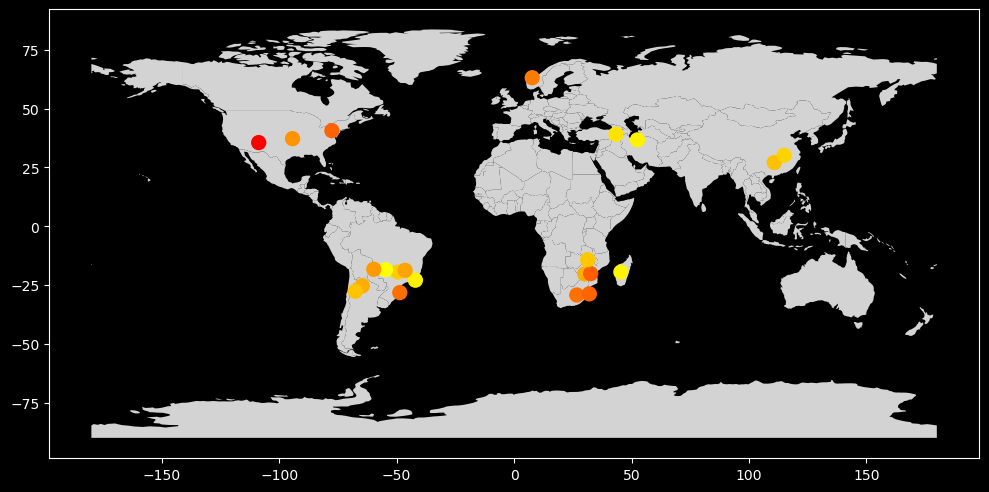

In [8]:
%%capture --no-display

# Configure the map plot
import mplcursors

worldmap = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(12, 12))
hotel_df = hotel_df.reset_index()
x = hotel_df['Lng']
y = hotel_df['Lat']
z = hotel_df['Humidity']
sc = plt.scatter(x, y, s=100, c=z, alpha=1.0, cmap='autumn', zorder=10)

def show_info(sel):
    ind = sel.target.index
    sel.annotation.set_text(f'Lng:{hotel_df.loc[ind, "Lng"]}\nLat:{hotel_df.loc[ind, "Lat"]}\nCity:{hotel_df.loc[ind, "City"]}\nHumidity:{hotel_df.loc[ind, "Humidity"]}\nHotel Name:{hotel_df.loc[ind, "Hotel Name"]}\nCountry:{hotel_df.loc[ind, "Country"]}')


mplcursors.cursor(hover=True).connect('add', show_info)

# Display the map
worldmap.plot(color='lightgrey', ax=ax, zorder=5)
plt.show()
